<a href="https://colab.research.google.com/github/onlyreynaldo/python-clustering-data/blob/main/Ejercicios-aula4_parte1_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Autor**: Prof. Dino Magri

**Contato**: `professor.dinomagri@gmail.com`

**Licença deste notebook**: 
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


---

# Análise de Cluster

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pasta_raiz = '/content/drive/My Drive/datasets'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv(f'{pasta_raiz}/entregas.csv', sep=',')

In [ ]:
dados.head()

In [ ]:
dados.shape

In [ ]:
dados.plot(
    kind='scatter',
    x='distancia',
    y='tempo'
);

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
dados = dados.drop(columns='id_motorista')

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(dados)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
centroides = kmeans.cluster_centers_

In [ ]:
print(centroides)

In [ ]:
plt.scatter(dados['distancia'], dados['tempo'], c=kmeans.labels_, s=50, alpha=0.7)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)

### Com 3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3).fit(dados)
centroides = kmeans.cluster_centers_

In [ ]:
plt.scatter(dados['distancia'], dados['tempo'], c=kmeans.labels_, s=50, alpha=0.7)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)

### Com 4 clusters

In [ ]:
kmeans = KMeans(n_clusters=4).fit(dados)
centroides = kmeans.cluster_centers_

In [ ]:
plt.scatter(dados['distancia'], dados['tempo'], c=kmeans.labels_, s=50, alpha=0.7)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)

## Definir o valor de k

Podemos utilizar o método "Elbow" (cotovelo) para visualizar qual a quantidade de de clusters que seria o ideal.

In [ ]:
# Within Sum of Square
n_clusters = []
sse = []

for i in range(2, 19):
    kmeans = KMeans(n_clusters=i).fit(dados)
    n_clusters.append(i)
    sse.append(kmeans.inertia_)

In [ ]:
plt.plot(n_clusters, sse, marker="X");
plt.xlabel("Número de clusters")
plt.ylabel("WSS - Within Sum of Square")
plt.title("Método Elbow para KMeans");

### Avaliando

Iremos utilizar o método de interpretação e validação chamadado Silhouette (silhueta em ptBR). Ese método oferece uma representação sucinta de quão bem cada ponto foi classificado.

O valor calculado é uma medida de quão semelhando um objeto é ao seu próprio cluster em comparação com outros clusters. **O valor varia entre -1 até +1**, onde um valor alto indica que o objeto é bem correspondido ao seu próprio cluster e mal correspondido aos agrupamentos vizinhos.

Se a maioria dos objetos tiver um valor alto, a configuração do cluster está apropriada.

Se muitos pontos tiverem um valor baixo ou negativo, a configuração de cluster pode ter muitos ou poucos clusters, será necessário ajustar.

Valor perto do 0, indica que existem grupos que se sobrepõem.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
n_clusters = []

for i in range(2, 19):
    kmeans = KMeans(n_clusters=i).fit(dados)
    n_clusters.append(i)
    r = silhouette_score(dados, kmeans.labels_)
    silhouette_coefficients.append(r)

In [ ]:
plt.plot(n_clusters, silhouette_coefficients, marker="X");
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Coefficients")
plt.title("Silhouette Score");

### Comparando os dois resultados

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(8,8))
axs[0].plot(n_clusters, sse, marker="X");
axs[0].title.set_text("Método Elbow para KMeans")

axs[1].plot(n_clusters, silhouette_coefficients, marker="X")
axs[1].title.set_text("Silhouette Score");

# Exercício

Utilizando a base `olist.csv` realize a análise de cluster utilizando o método K-Means.


**1) Carregue o conjunto de dados na variável `df_olist`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pasta_raiz = '/content/drive/My Drive/datasets'

df_olist = pd.read_csv(f'{pasta_raiz}/olist.csv', sep=';')

In [2]:
df_olist.head()

,id_pedido,id_cliente,status_pedido,data_hora_compra_pedido,pedido_aprovado_em,pedido_entregue_na_transportadora,data_realizada_entrega_pedido,data_prevista_entrega_pedido,id_exclusivo_cliente,prefixo_cep_cliente,cidade_cliente,estado_cliente,id_revisao,pontuacao_revisao,sequencial_pagamento,tipo_pagamento,parcelas_pagamento,valor_pagamento,id_item_pedido,id_produto,id_vendedor,data_limite_envio,preco,preco_frete,nome_categoria_produto,comprimento_nome_produto,comprimento_descricao_produto,qtde_fotos_produto,peso_gramas_produto,comprimento_cm_produto,altura_cm_produto,largura_cm_produto,prefixo_cep_vendedor,cidade_vendedor,estado_vendedor
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,entregue,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,entregue,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,entregue,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,entregue,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,1,credit_card,3,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,entregue,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,1,credit_card,1,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP


**2) Imprime as 5 primeiras linhas**

In [3]:
df_olist.head()

,id_pedido,id_cliente,status_pedido,data_hora_compra_pedido,pedido_aprovado_em,pedido_entregue_na_transportadora,data_realizada_entrega_pedido,data_prevista_entrega_pedido,id_exclusivo_cliente,prefixo_cep_cliente,cidade_cliente,estado_cliente,id_revisao,pontuacao_revisao,sequencial_pagamento,tipo_pagamento,parcelas_pagamento,valor_pagamento,id_item_pedido,id_produto,id_vendedor,data_limite_envio,preco,preco_frete,nome_categoria_produto,comprimento_nome_produto,comprimento_descricao_produto,qtde_fotos_produto,peso_gramas_produto,comprimento_cm_produto,altura_cm_produto,largura_cm_produto,prefixo_cep_vendedor,cidade_vendedor,estado_vendedor
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,entregue,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,entregue,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,entregue,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,entregue,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,1,credit_card,3,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,entregue,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,1,credit_card,1,37.77,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP


**3) Quantas linhas e colunas existem no DataFrame criado?**

In [4]:
df_olist.shape

(116591, 35)

**5) Selecione apenas as colunas na variável `df_olist`**

`['id_exclusivo_cliente','id_cliente','valor_pagamento','preco_frete']`

In [5]:
df_olist_formatado = df_olist[['id_exclusivo_cliente','id_cliente','valor_pagamento','preco_frete']]
df_olist_formatado = df_olist[['id_exclusivo_cliente','id_cliente','valor_pagamento','preco_frete']].copy()

In [6]:
df_olist_formatado.head()

,id_exclusivo_cliente,id_cliente,valor_pagamento,preco_frete
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,18.12,8.72
1,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,2.00,8.72
2,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,18.59,8.72
3,3a51803cc0d012c3b5dc8b7528cb05f7,a20e8105f23924cd00833fd87daa0831,37.77,7.78
4,ef0996a1a279c26e7ecbd737be23d235,26c7ac168e1433912a51b924fbd34d34,37.77,7.78


**6) Faça o agrupamento pela coluna `id_exclusivo_cliente` e aplique as seguintes funções de agregação para as respectivas colunas**

* valor_pagamento: `sum`
* preco_frete: `sum`
* id_cliente: `count`
    
Lembre-se de reinicar o indice do DataFrame criado.

In [7]:
## Otra forma
import numpy as np

(
    df_olist
      .groupby(df_olist["id_exclusivo_cliente"])
      .agg({"valor_pagamento": [np.sum],
            "preco_frete": [np.sum],
            "id_cliente": [np.size]})
      .head(3)
)

,valor_pagamento,preco_frete,id_cliente
,sum,sum,size
id_exclusivo_cliente,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,12.00,1
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,8.29,1
0000f46a3911fa3c0805444483337064,86.22,17.22,1


In [7]:
## Otra forma 

df_agrupado = (
  df_olist
    .groupby('id_exclusivo_cliente')
    .agg({
        'valor_pagamento':'sum',
        'preco_frete':'sum',
        'id_cliente':'count'})
     .reset_index()
)  
## Reset_Index es para mantener a la columa y no convertirse en index la primera columna

In [8]:
df_agrupado.head()

,id_exclusivo_cliente,valor_pagamento,preco_frete,id_cliente
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,12.00,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,8.29,1
2,0000f46a3911fa3c0805444483337064,86.22,17.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,17.63,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,16.89,1


In [9]:
df_agrupado.shape

(94094, 4)

**7) Crie o gráfico de dispersão para as variáveis `valor_pagamento` e `preco_frete`**


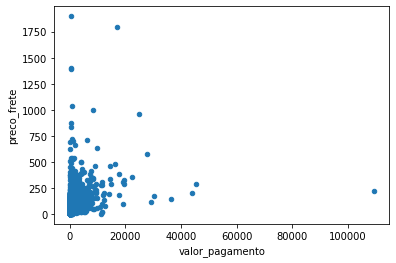

In [10]:
df_agrupado.plot(kind='scatter', x='valor_pagamento', y='preco_frete');

**8) Defina o valor de k**

Utilize o método "Elbow" (cotovelo) para visualizar qual a quantidade de de clusters. Teste com 2 até 21 clusters. Utilize as variáveis `valor_pagamento` e `preco_frete`

In [11]:
df_agrupado.head()

,id_exclusivo_cliente,valor_pagamento,preco_frete,id_cliente
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,12.00,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,8.29,1
2,0000f46a3911fa3c0805444483337064,86.22,17.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,17.63,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,16.89,1


In [12]:
X = df_agrupado.drop(columns=['id_exclusivo_cliente','id_cliente'])
X.head()

,valor_pagamento,preco_frete
0,141.90,12.00
1,27.19,8.29
2,86.22,17.22
3,43.62,17.63
4,196.89,16.89


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
!pip install yellowbrick==1.2

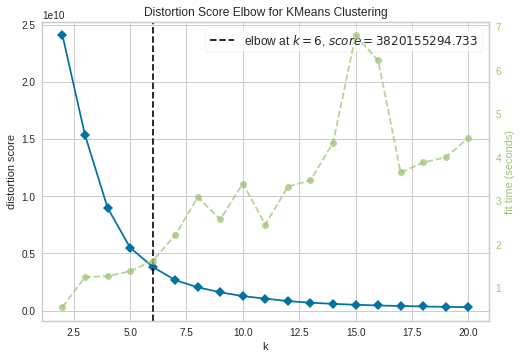

In [15]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))
visualizer.fit(X)
visualizer.show();

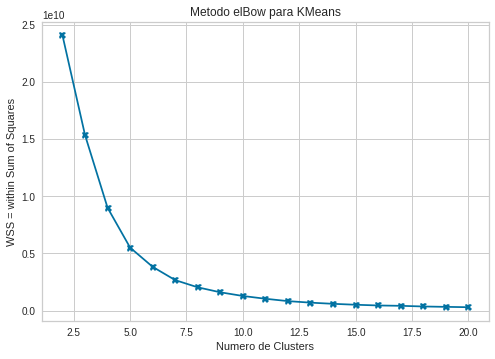

In [21]:
n_clusters = []
wss = [] # within sum of squares

for i in range(2,21):
  kmeans = KMeans(n_clusters=i).fit(X)
  wss.append(kmeans.inertia_)
  n_clusters.append(i)

plt.plot(n_clusters, wss, marker='X');
plt.xlabel('Numero de Clusters');
plt.ylabel('WSS = within Sum of Squares');
plt.title('Metodo elBow para KMeans');

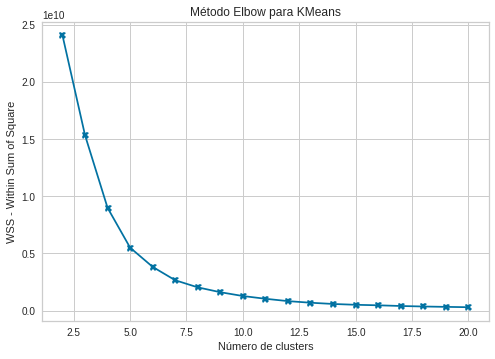

In [18]:
df_agrup_clientes = df_agrupado[['valor_pagamento', 'preco_frete']].copy()

sse = []
n_clusters = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i).fit(df_agrup_clientes)
    sse.append(kmeans.inertia_)
    n_clusters.append(i)

plt.plot(n_clusters, sse, marker="X");
plt.xlabel("Número de clusters")
plt.ylabel("WSS - Within Sum of Square")
plt.title("Método Elbow para KMeans");

In [28]:
df_agrup_clientes.shape

(94094, 2)

In [29]:
df_agrupado.shape

(94094, 4)

In [30]:
X.shape

(94094, 2)

**9) Com base no método Elbow selecione a quantidade de clusters. Utilize o algoritmo `K-Means`. Também crie um gráfico de dispersão com a separação dos grupos. Utilize o método plt.scatter, com os seguintes parâmetros:**

    c=kmeans.labels_
    cmap='tab20'
    s=50
    alpha=0.7

In [31]:
kmeans = KMeans(n_clusters=6).fit(X)

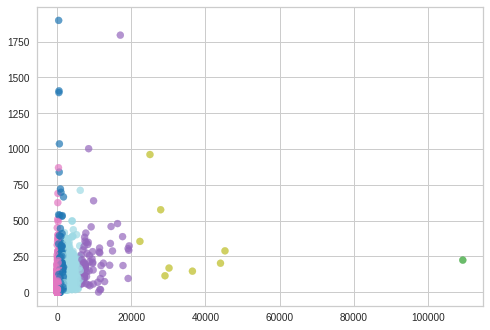

In [32]:
plt.scatter(
    df_agrup_clientes['valor_pagamento'], 
    df_agrup_clientes['preco_frete'], 
    c=kmeans.labels_,
    cmap='tab20',
    s=50, 
    alpha=0.7
);

**10) Utilize o método da Silhueta para verificar o quão bom está o agrupamento realizado.**

### Ajustando o modelo

Note que as variáveis estão em escalas diferentes, para isso, será necessário transformar as variáveis numéricas para utilizar a mesma escala.

É uma etapa de pré-processamento de dados para a maioria dos algoritmos e pode impactar significativamente o desempenho do seu algoritmo.

In [ ]:
from sklearn.preprocessing import StandardScaler

 Essa classe `StandardScaler` implementa um tipo de padronização dos dados. Essa padronização, define os valores de cada recurso numérico em seu conjunto de dados para que as variáveis (`features`) tenham uma média de 0 e desvio padrão 1.

In [ ]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(df_agrup_clientes)

In [ ]:
scaled_features[:, 0]

In [ ]:
scaled_features[:, 1]

**11) Aplique o KMeans, para o nome conjunto de dados scaled_features criado anteriormente.**

**12) Faça a plotagem dos grupos. Utilize o método plt.scatter, com os seguintes parâmetros:**

    c=kmeans.labels_
    cmap='tab20'
    s=50
    alpha=0.7**

**13) Utilize o método da Silhueta para verificar o quão bom está o agrupamento realizado com a padronização dos dados**